[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'^GSPC'}, xlabel='Date'>

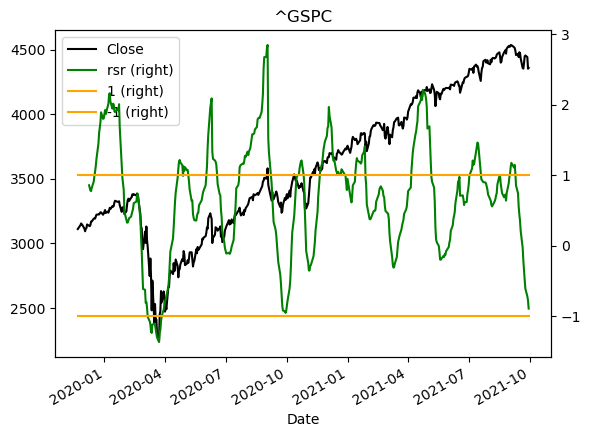

In [148]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyfinance.ols import RollingOLS, PandasRollingOLS
from scipy.stats import norm
import pandas_ta as ta

def slope(df):
    y=df['Close'].values
    x=df['X'].values
    fit = np.polyfit(x,y,deg=1)
    n = len(x)
    m = fit[0]
    c = fit[1]
    return m

def rolling_pipe(dataframe,window):
    return pd.Series([dataframe.iloc[i-window: i].pipe(slope) 
                      if i >= window else None 
                      for i in range(1, len(dataframe)+1)],
                     index = dataframe.index)

window=25
ticker='^GSPC'
df=yf.download(tickers= ticker,start= '2019-11-1', end='2021-9-30',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
df['X'] = np.arange(len(df))
df['MA']=df['Close'].rolling(window).mean()
df['pctchg']=df['Close'].pct_change()*100
df['stdev'] = df['pctchg'].rolling(window).std()
df['slope']=df.pipe(rolling_pipe, window)
df['lrrr']=100*(window-1)*df['slope']/(df['MA']-(window-1)/2*df['slope'])
df['rsr']=df['lrrr']/(window**0.5*df['stdev'])
df['1']=1
df['-1']=-1

df.loc[df.index>'2019-11-21'][['Close','rsr','1','-1']].plot(secondary_y=['rsr','1','-1'],title=ticker,color=['black','green','orange','orange'])

In [149]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 5,
                       ):
    print(df)

SyntaxError: unexpected EOF while parsing (1186292620.py, line 5)